# Develop a ML Model for classifying iris flowers based on their features using Python, scikit-learn.

In [158]:
import sklearn
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [159]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [160]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [161]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [163]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Checking Missing Values

In [164]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Checking Duplicates

In [165]:
data = df.drop_duplicates(subset ="Species",)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [166]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Data Analysis

<Axes: >

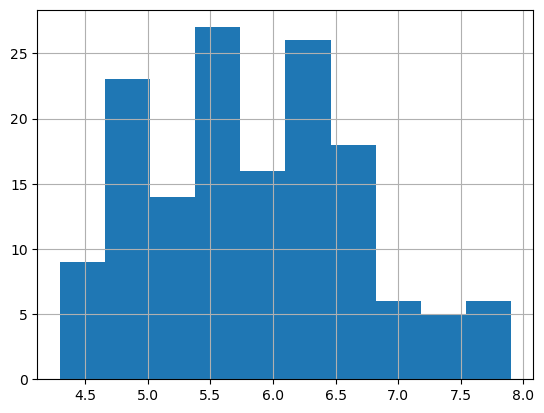

In [167]:
df['SepalLengthCm'].hist()

<Axes: >

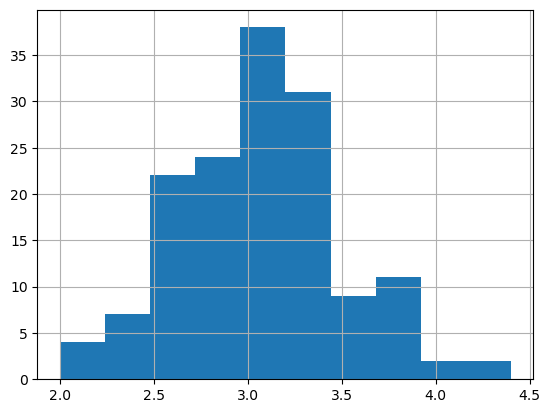

In [168]:
df['SepalWidthCm'].hist()

<Axes: >

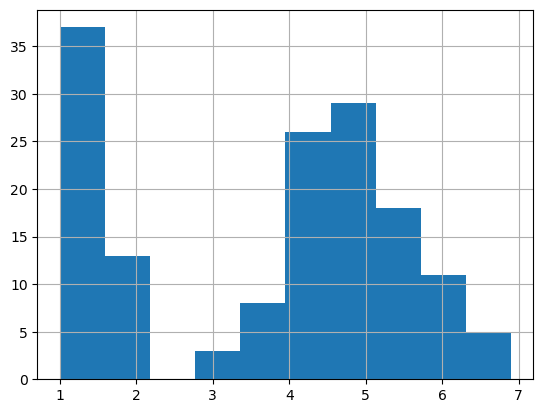

In [169]:
df['PetalLengthCm'].hist()

<Axes: >

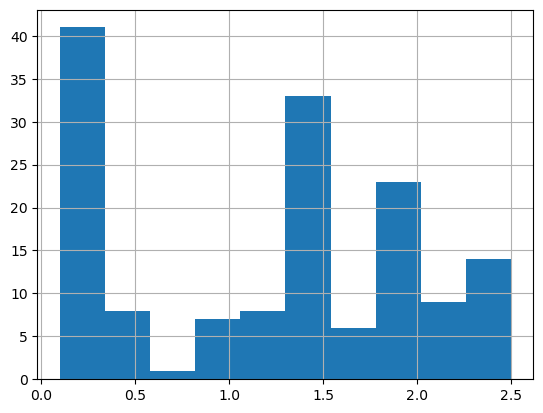

In [170]:
df['PetalWidthCm'].hist()

In [171]:
#create list of colors and class labels
colors = ['red', 'orange', 'blue']
Species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

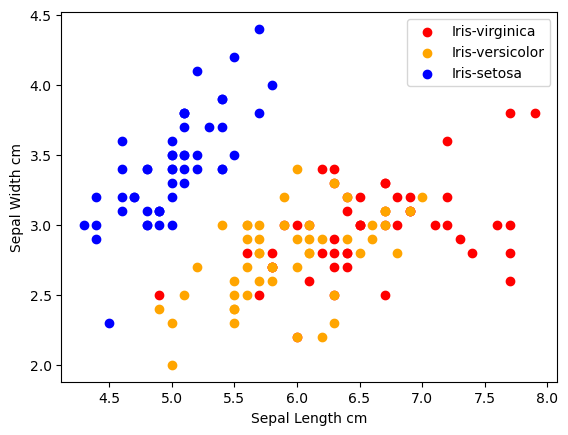

In [172]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == Species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=Species[i])
plt.xlabel("Sepal Length cm")
plt.ylabel("Sepal Width cm")
plt.legend()

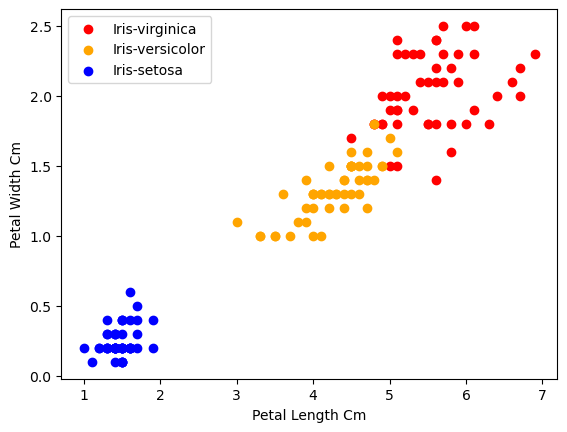

In [173]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == Species[i]]
    #plot the scatter plot
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=Species[i])
plt.xlabel("Petal Length Cm")
plt.ylabel("Petal Width Cm")
plt.legend()

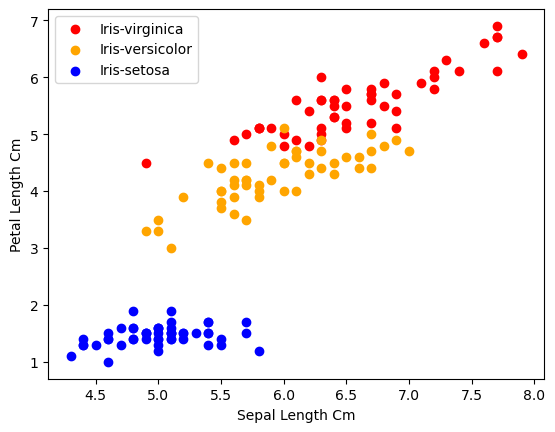

In [174]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == Species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=Species[i])
plt.xlabel("Sepal Length Cm")
plt.ylabel("Petal Length Cm")
plt.legend()

# Correlation Matrix

In [175]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


<Axes: >

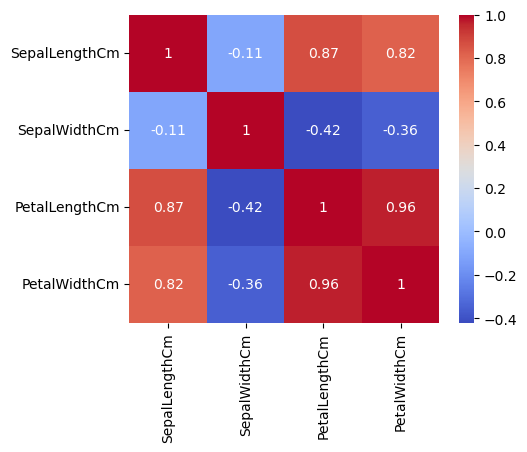

In [176]:
corr = numeric_columns.corr()
# plot the heat mop
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [177]:
'''
From above
Sepal & petal length: Strong positive correlation, meaning longer sepals often have longer petals.
Sepal & petal width: Moderate positive correlation, indicating wider sepals tend to have slightly wider petals.
Petal length & width: Strong positive correlation, signifying longer petals are usually also wider.
'''

'\nFrom above\nSepal & petal length: Strong positive correlation, meaning longer sepals often have longer petals.\nSepal & petal width: Moderate positive correlation, indicating wider sepals tend to have slightly wider petals.\nPetal length & width: Strong positive correlation, signifying longer petals are usually also wider.\n'

# Model Training and Testing

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Input data
X = df.drop(columns=['Species'])
# Output data
Y = df['Species']

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, Y, cv=7)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.95454545 1.         0.90909091 0.95238095 0.85714286 1.
 1.        ]
Mean Accuracy: 0.9533085961657389


In [179]:
import pickle

# Train the Random Forest Classifier
rf_model.fit(X, Y)

# Save the trained model to a file using pickle
filename = 'random_forest_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [180]:
# Load the saved Random Forest model
filename = 'random_forest_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Create a DataFrame with the new data for prediction
new_data = pd.DataFrame({
    'SepalLengthCm': [6],
    'SepalWidthCm': [3],
    'PetalLengthCm': [4],
    'PetalWidthCm': [1]
})

# Make predictions on the new data
predictions = loaded_model.predict(new_data)

# Print the predictions
print("Predicted Flower Species:", predictions)

Predicted Flower Species: ['Iris-versicolor']
